In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict


In [3]:
file_path = "./survey_results_public_submit.csv"
df = pd.read_csv(file_path)

In [4]:
workstation = df[["LanguageWorkedWith", "LanguageDesireNextYear", "DatabaseWorkedWith", "DatabaseDesireNextYear", "PlatformWorkedWith", "PlatformDesireNextYear", "WebFrameWorkedWith", "WebFrameDesireNextYear", "MiscTechWorkedWith", "MiscTechDesireNextYear"]]
language = workstation["LanguageWorkedWith"]

In [5]:
def handle_series(input):
    item_list = []
    
    for row in input:
        # clean the data by using regularization
        row_split = row.split(";")
        for each_item in row_split:
            item_list.append(each_item)
            
    return item_list

def plot_helper(current_name, desire_name, name_list_dict):
    c_list = name_list_dict[current_name]
    d_list = name_list_dict[desire_name]
    
    item_counts = Counter(name_list_dict[current_name])
    sorted_item_counts = OrderedDict(item_counts.most_common())
    df = pd.DataFrame.from_dict(sorted_item_counts, orient='index')
    df.plot(subplots=True, layout=(1,1), figsize = (18,10), kind='bar', title = current_name)
    
    item_counts = Counter(name_list_dict[desire_name])
    sorted_item_counts = OrderedDict(item_counts.most_common())
    df = pd.DataFrame.from_dict(sorted_item_counts, orient='index')
    df.plot(subplots=True, layout=(1,1), figsize = (18,10), kind='bar', title = desire_name)
    

    

In [6]:
columns = workstation.columns
name_list_dict = {}

for i in range(len(columns)):
    current_name = columns[i]
    # drop NAN item
    current = workstation[current_name].dropna()
    current_list = handle_series(current)
    
    name_list_dict[current_name] = current_list
    

In [19]:
print("The number of rows in LanguageWorkedWith is: " + str(len(workstation['LanguageWorkedWith'])))
print("After dropping NAN, the number is: " + str(len(workstation['LanguageWorkedWith'].dropna())))

The number of rows in LanguageWorkedWith is: 88883
After dropping NAN, the number is: 87569


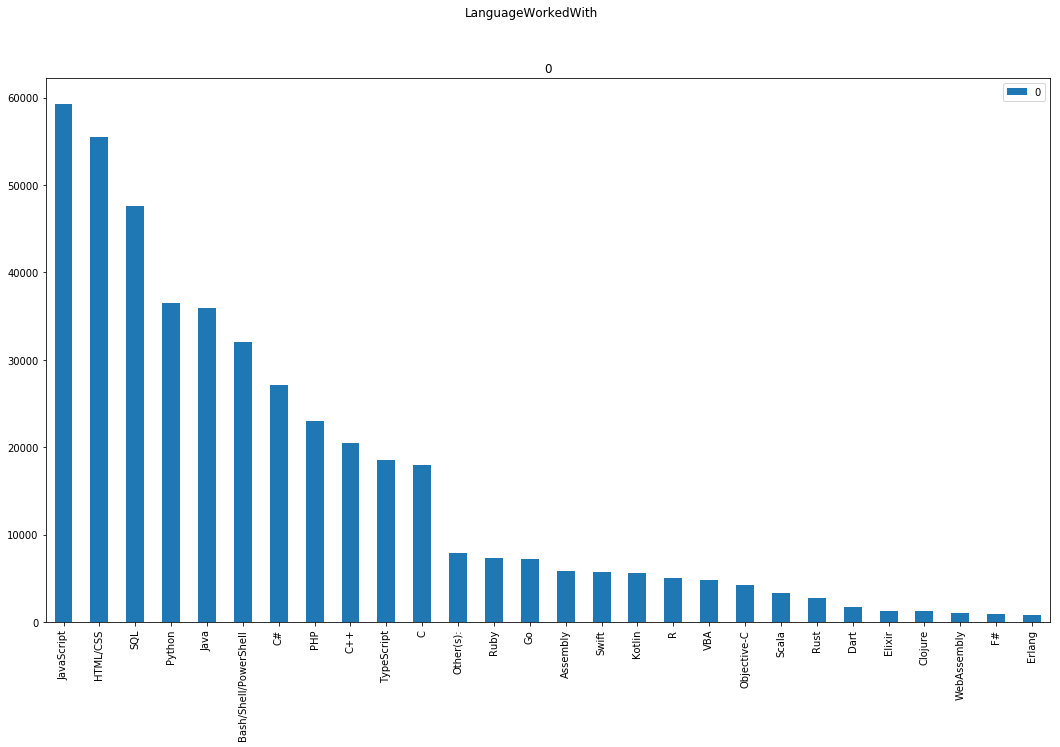

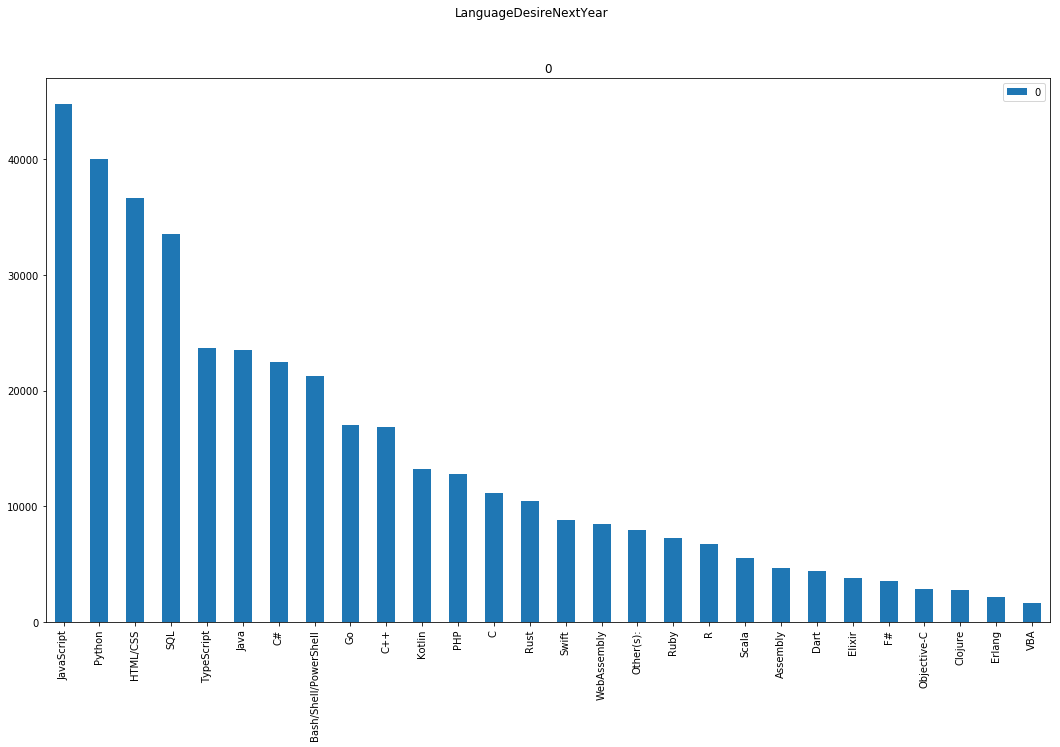

In [7]:
plot_helper('LanguageWorkedWith', 'LanguageDesireNextYear', name_list_dict)

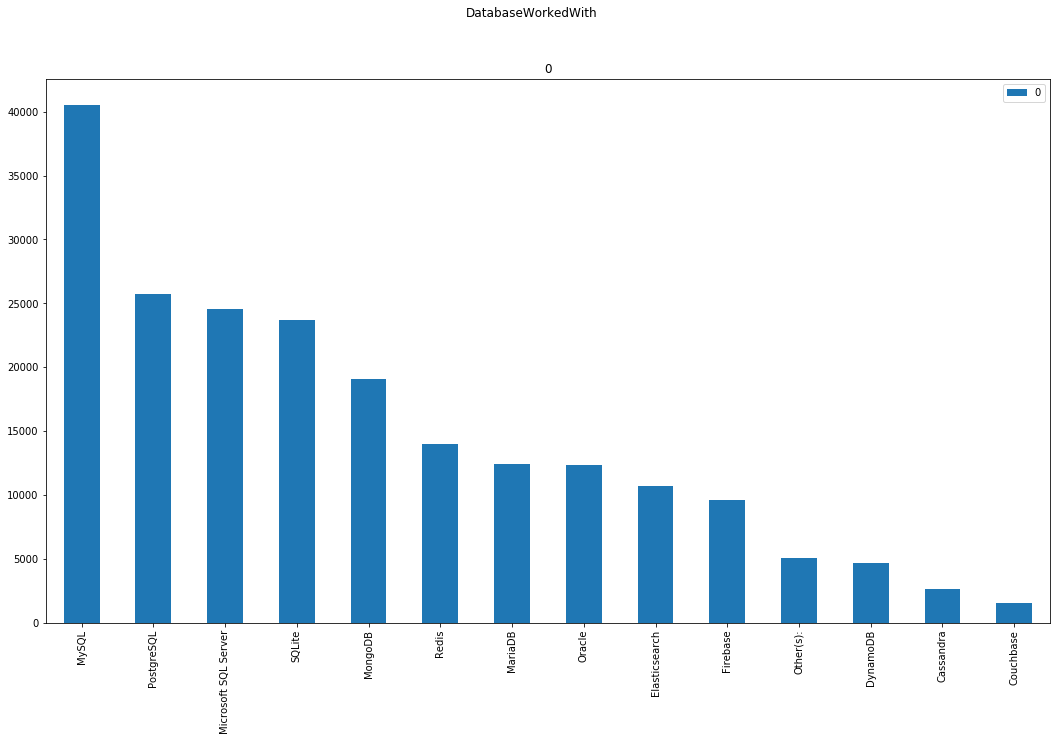

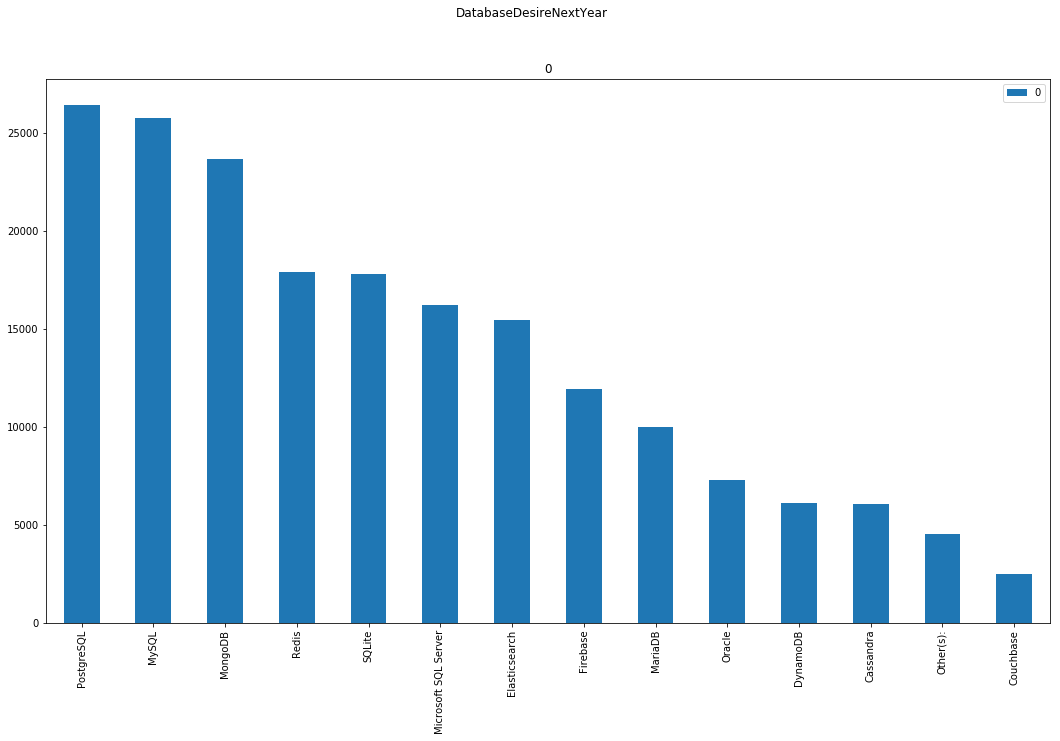

In [8]:
plot_helper('DatabaseWorkedWith', 'DatabaseDesireNextYear', name_list_dict)

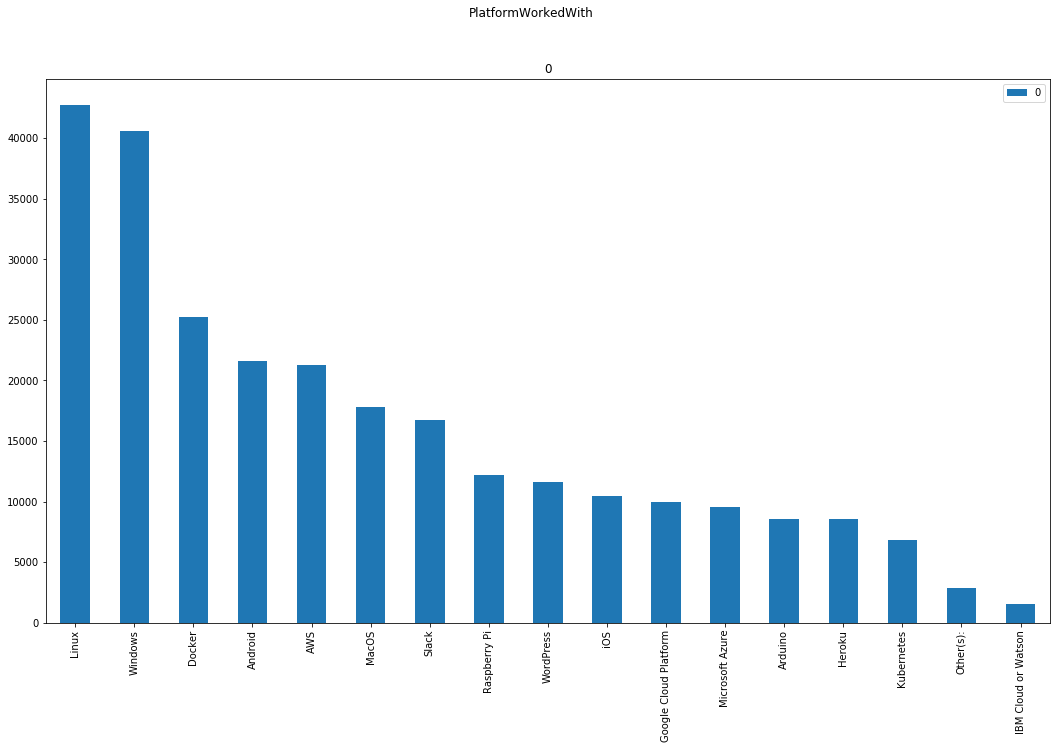

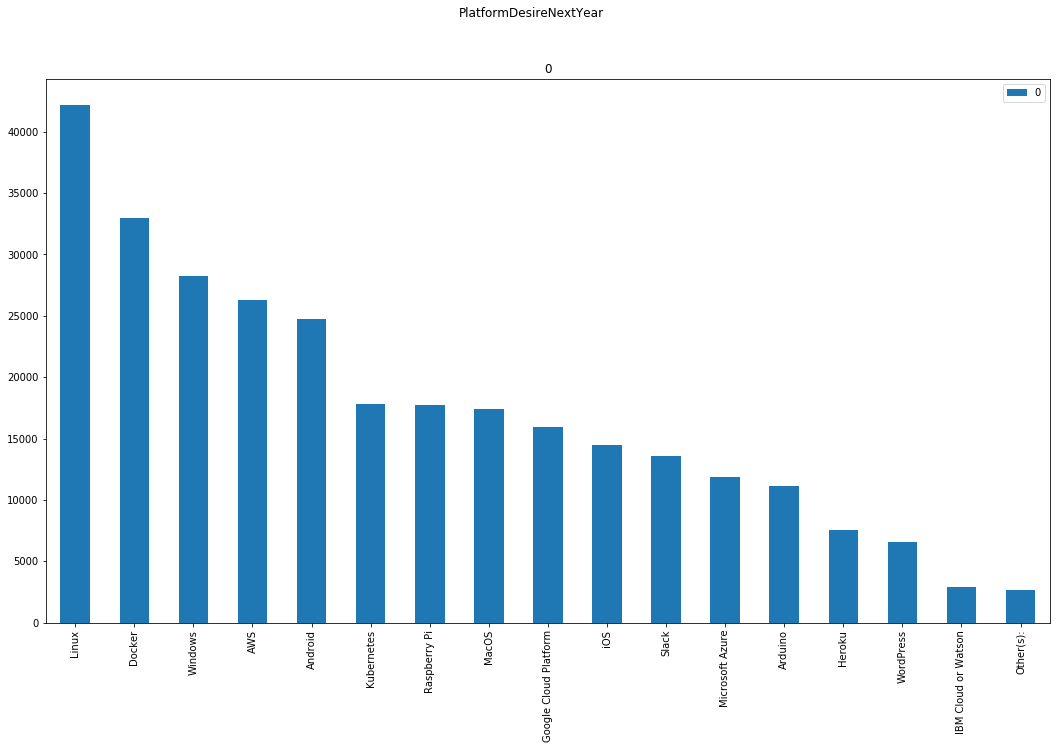

In [9]:
plot_helper('PlatformWorkedWith', 'PlatformDesireNextYear', name_list_dict)

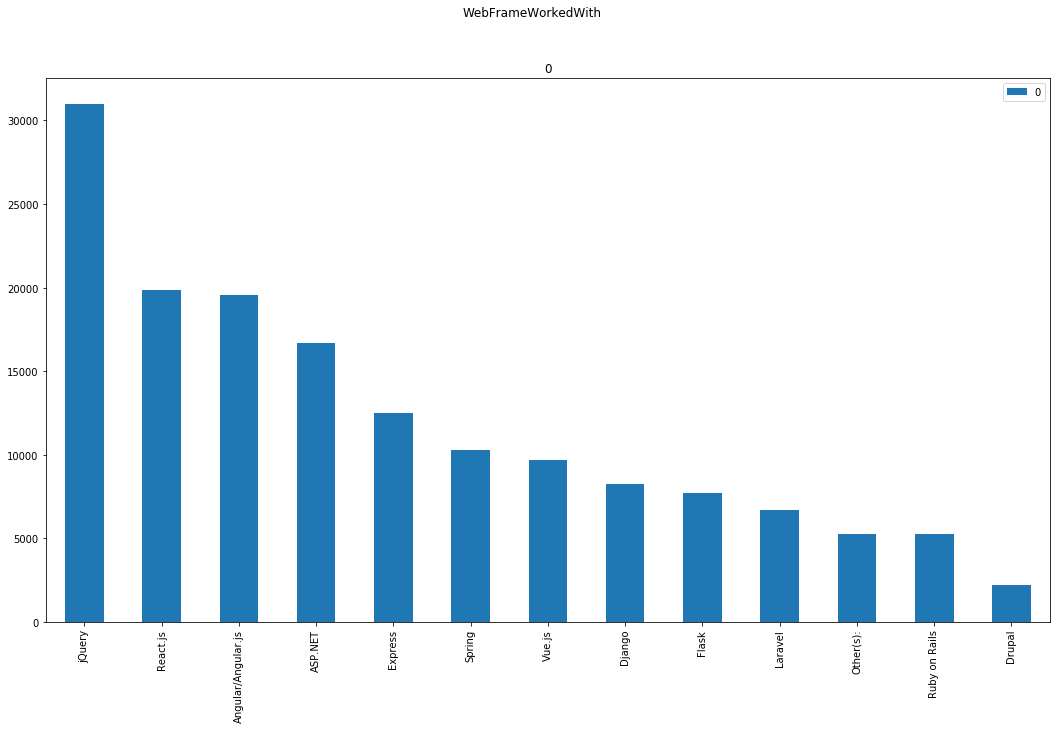

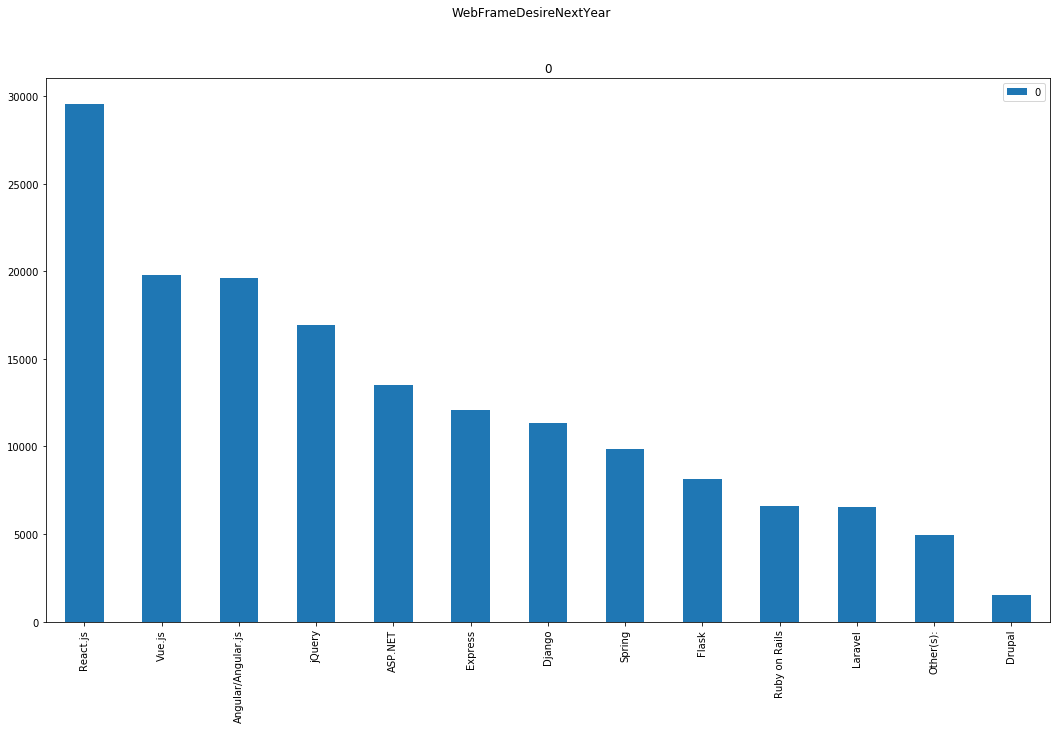

In [10]:
plot_helper('WebFrameWorkedWith', 'WebFrameDesireNextYear', name_list_dict)

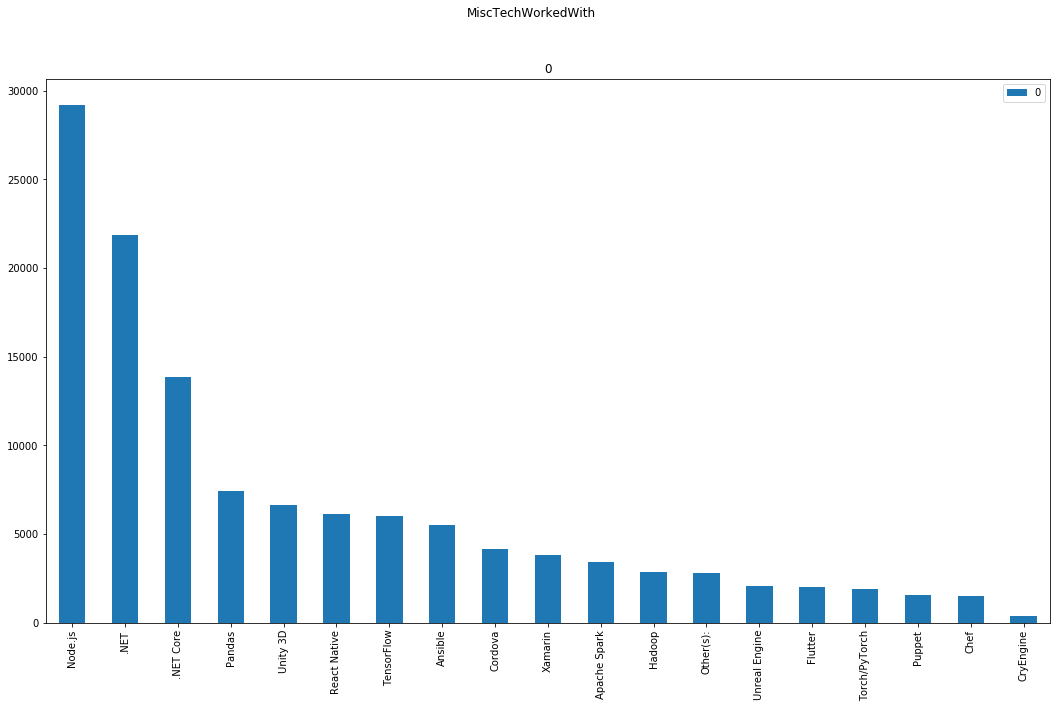

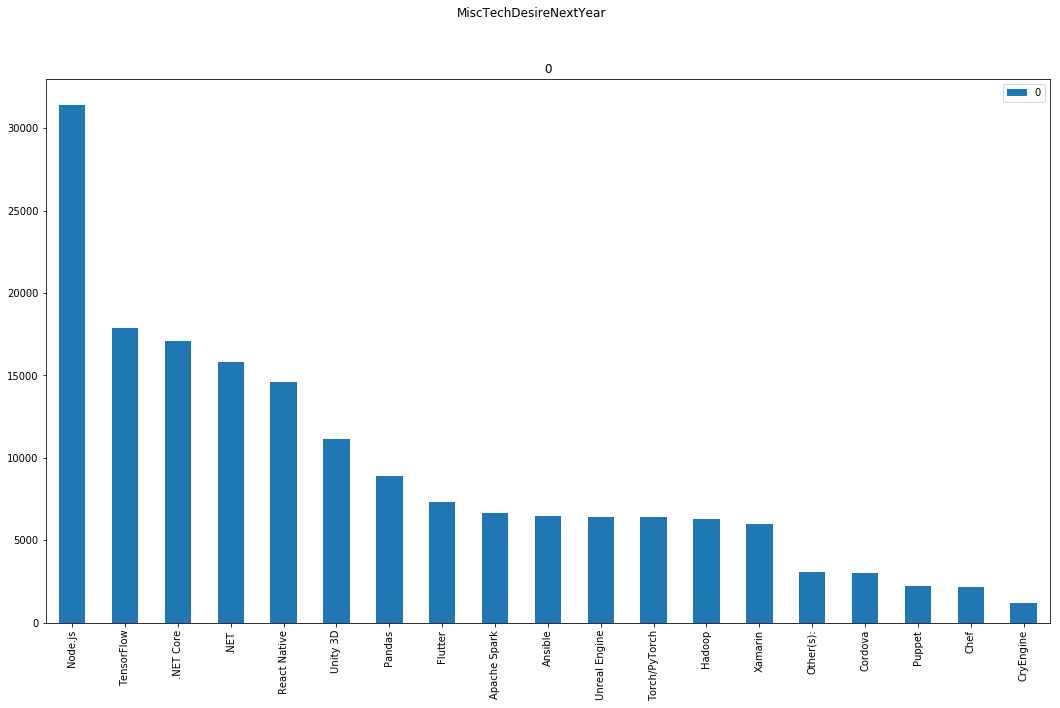

In [11]:
plot_helper('MiscTechWorkedWith', 'MiscTechDesireNextYear', name_list_dict)

In [29]:
name = 'MiscTechDesireNextYear'

print("The number of rows in LanguageWorkedWith is: " + str(len(workstation[name])))
print("After dropping NAN, the number is: " + str(len(workstation[name].dropna())))

The number of rows in LanguageWorkedWith is: 88883
After dropping NAN, the number is: 64511
